# Importing all the necessary libraries

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
df = pd.read_csv("CE802_P2_Data.csv")

## Exploring the dataset

In [3]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16,6.03,-4.56,30.00,63.04,0.55,-0.78,0.96,-1.67,1,-339.75,0.84,9.90,-2.22,-9.53,False
1,6,1.41,-4.24,31.38,100.04,0.06,1.08,0.60,-3.67,1,-246.75,-0.62,12.32,-0.56,NaN,False
2,630,43.35,0.50,50.70,219.04,-3.46,10.08,5.65,-14.67,10,-129.75,-3.40,1.80,8.48,-10.29,False
3,30,2.79,-3.58,31.83,69.04,-0.40,-0.09,0.18,-1.67,1,-276.75,-0.32,13.32,1.36,-9.92,False
4,18,0.36,-6.62,32.97,75.04,2.43,0.24,0.48,-0.67,1,-294.75,3.14,10.80,-5.86,NaN,True


In [4]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,750.000000
mean,218.049333,14.90628,-0.829733,41.063440,133.485333,-1.592947,5.390220,3.854280,-7.308000,5.403333,-307.992000,0.244707,7.315067,3.542427,-10.463013
std,234.669160,12.97563,5.090345,9.500727,71.416874,2.513850,7.662813,3.465276,7.159315,4.504907,120.565344,2.217929,4.982472,5.081288,1.005117
min,0.000000,0.00000,-17.560000,30.000000,54.040000,-6.070000,-19.800000,0.000000,-24.670000,0.000000,-609.750000,-4.480000,-1.700000,-14.520000,-12.820000
25%,30.000000,3.72000,-4.600000,32.160000,78.040000,-4.000000,-0.300000,0.600000,-14.670000,1.000000,-354.750000,-1.060000,2.560000,-0.220000,-11.210000
50%,100.000000,6.21000,-2.810000,33.240000,98.040000,-0.610000,2.400000,1.020000,-3.670000,1.000000,-291.750000,-0.060000,9.220000,1.580000,-10.470000
75%,390.000000,24.60000,4.080000,49.350000,194.040000,0.350000,12.877500,7.050000,-1.670000,10.000000,-252.750000,1.400000,10.985000,8.500000,-9.742500
max,780.000000,47.10000,8.300000,60.450000,299.040000,6.070000,18.810000,10.350000,1.330000,10.000000,35.250000,8.720000,22.780000,12.860000,-7.740000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   int64  
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB


In [6]:
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16,6.03,-4.56,30.00,63.04,0.55,-0.78,0.96,-1.67,1,-339.75,0.84,9.90,-2.22,-9.53,False
1,6,1.41,-4.24,31.38,100.04,0.06,1.08,0.60,-3.67,1,-246.75,-0.62,12.32,-0.56,NaN,False
2,630,43.35,0.50,50.70,219.04,-3.46,10.08,5.65,-14.67,10,-129.75,-3.40,1.80,8.48,-10.29,False
3,30,2.79,-3.58,31.83,69.04,-0.40,-0.09,0.18,-1.67,1,-276.75,-0.32,13.32,1.36,-9.92,False
4,18,0.36,-6.62,32.97,75.04,2.43,0.24,0.48,-0.67,1,-294.75,3.14,10.80,-5.86,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,740,19.05,5.18,46.65,54.04,-3.86,15.30,9.80,-4.67,10,-534.75,1.08,1.24,4.78,NaN,False
1496,2,4.29,-5.10,30.54,86.04,1.84,-1.77,0.73,-1.67,1,-279.75,-1.56,13.72,-1.46,-10.00,False
1497,160,20.25,5.42,51.60,114.04,-3.73,15.18,7.30,-4.67,10,-399.75,0.44,-0.56,10.12,NaN,True
1498,220,20.10,2.12,50.55,239.04,-3.24,13.38,6.40,-14.67,10,-39.75,-3.72,1.22,9.06,NaN,False


In [8]:
df.isna().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

## Filling the the mean value of the feature on empty cells

In [9]:
df['F15'] = df['F15'].fillna(df['F15'].mean())

In [10]:
df.isna().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
Class    0
dtype: int64

In [49]:
labelEncoder = LabelEncoder()
df["Class"]=labelEncoder.fit_transform(df["Class"])
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16,6.03,-4.56,30.00,63.04,0.55,-0.78,0.96,-1.67,1,-339.75,0.84,9.90,-2.22,-9.530000,0
1,6,1.41,-4.24,31.38,100.04,0.06,1.08,0.60,-3.67,1,-246.75,-0.62,12.32,-0.56,-10.463013,0
2,630,43.35,0.50,50.70,219.04,-3.46,10.08,5.65,-14.67,10,-129.75,-3.40,1.80,8.48,-10.290000,0
3,30,2.79,-3.58,31.83,69.04,-0.40,-0.09,0.18,-1.67,1,-276.75,-0.32,13.32,1.36,-9.920000,0
4,18,0.36,-6.62,32.97,75.04,2.43,0.24,0.48,-0.67,1,-294.75,3.14,10.80,-5.86,-10.463013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,740,19.05,5.18,46.65,54.04,-3.86,15.30,9.80,-4.67,10,-534.75,1.08,1.24,4.78,-10.463013,0
1496,2,4.29,-5.10,30.54,86.04,1.84,-1.77,0.73,-1.67,1,-279.75,-1.56,13.72,-1.46,-10.000000,0
1497,160,20.25,5.42,51.60,114.04,-3.73,15.18,7.30,-4.67,10,-399.75,0.44,-0.56,10.12,-10.463013,1
1498,220,20.10,2.12,50.55,239.04,-3.24,13.38,6.40,-14.67,10,-39.75,-3.72,1.22,9.06,-10.463013,0


## Dividing the data into feaures and labels

In [50]:
x = df.drop(['Class'],axis=1)

In [51]:
x

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,16,6.03,-4.56,30.00,63.04,0.55,-0.78,0.96,-1.67,1,-339.75,0.84,9.90,-2.22,-9.530000
1,6,1.41,-4.24,31.38,100.04,0.06,1.08,0.60,-3.67,1,-246.75,-0.62,12.32,-0.56,-10.463013
2,630,43.35,0.50,50.70,219.04,-3.46,10.08,5.65,-14.67,10,-129.75,-3.40,1.80,8.48,-10.290000
3,30,2.79,-3.58,31.83,69.04,-0.40,-0.09,0.18,-1.67,1,-276.75,-0.32,13.32,1.36,-9.920000
4,18,0.36,-6.62,32.97,75.04,2.43,0.24,0.48,-0.67,1,-294.75,3.14,10.80,-5.86,-10.463013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,740,19.05,5.18,46.65,54.04,-3.86,15.30,9.80,-4.67,10,-534.75,1.08,1.24,4.78,-10.463013
1496,2,4.29,-5.10,30.54,86.04,1.84,-1.77,0.73,-1.67,1,-279.75,-1.56,13.72,-1.46,-10.000000
1497,160,20.25,5.42,51.60,114.04,-3.73,15.18,7.30,-4.67,10,-399.75,0.44,-0.56,10.12,-10.463013
1498,220,20.10,2.12,50.55,239.04,-3.24,13.38,6.40,-14.67,10,-39.75,-3.72,1.22,9.06,-10.463013


array([[<AxesSubplot:title={'center':'F1'}>,
        <AxesSubplot:title={'center':'F2'}>,
        <AxesSubplot:title={'center':'F3'}>,
        <AxesSubplot:title={'center':'F4'}>],
       [<AxesSubplot:title={'center':'F5'}>,
        <AxesSubplot:title={'center':'F6'}>,
        <AxesSubplot:title={'center':'F7'}>,
        <AxesSubplot:title={'center':'F8'}>],
       [<AxesSubplot:title={'center':'F9'}>,
        <AxesSubplot:title={'center':'F10'}>,
        <AxesSubplot:title={'center':'F11'}>,
        <AxesSubplot:title={'center':'F12'}>],
       [<AxesSubplot:title={'center':'F13'}>,
        <AxesSubplot:title={'center':'F14'}>,
        <AxesSubplot:title={'center':'F15'}>, <AxesSubplot:>]],
      dtype=object)

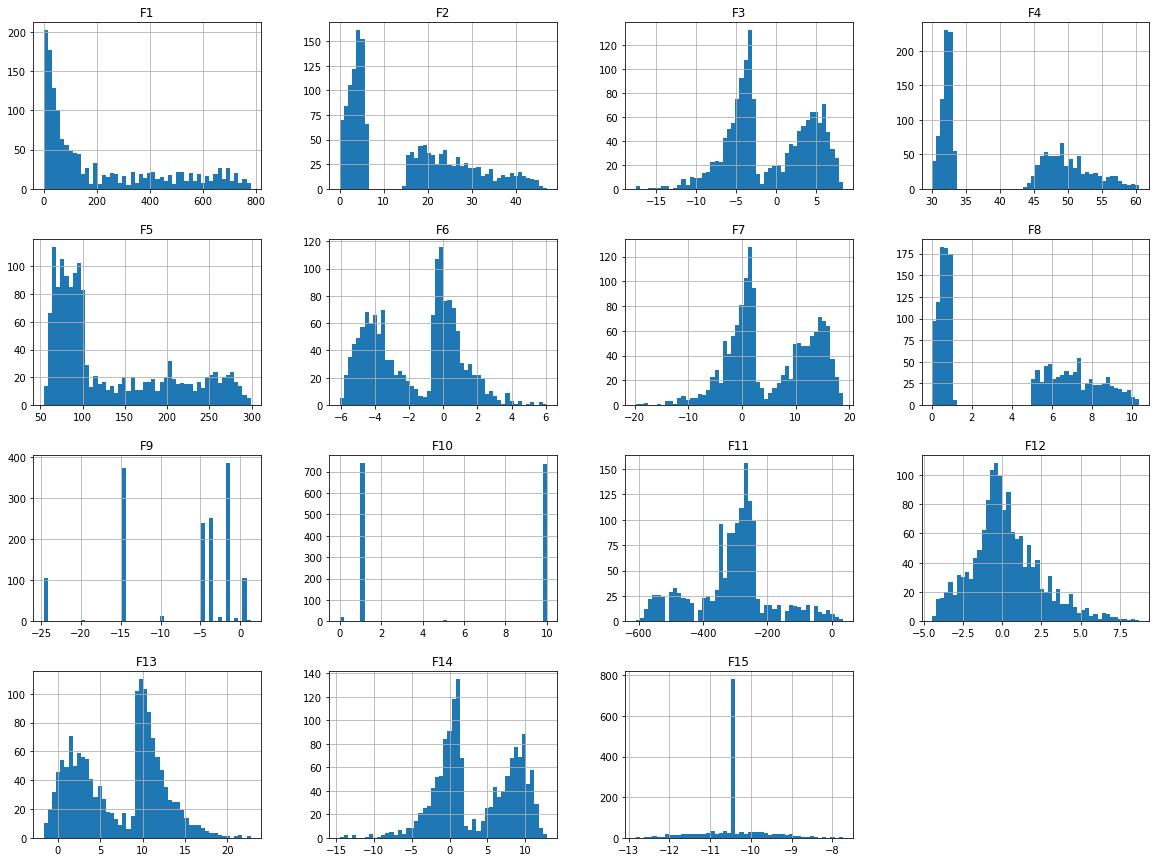

In [52]:
x.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

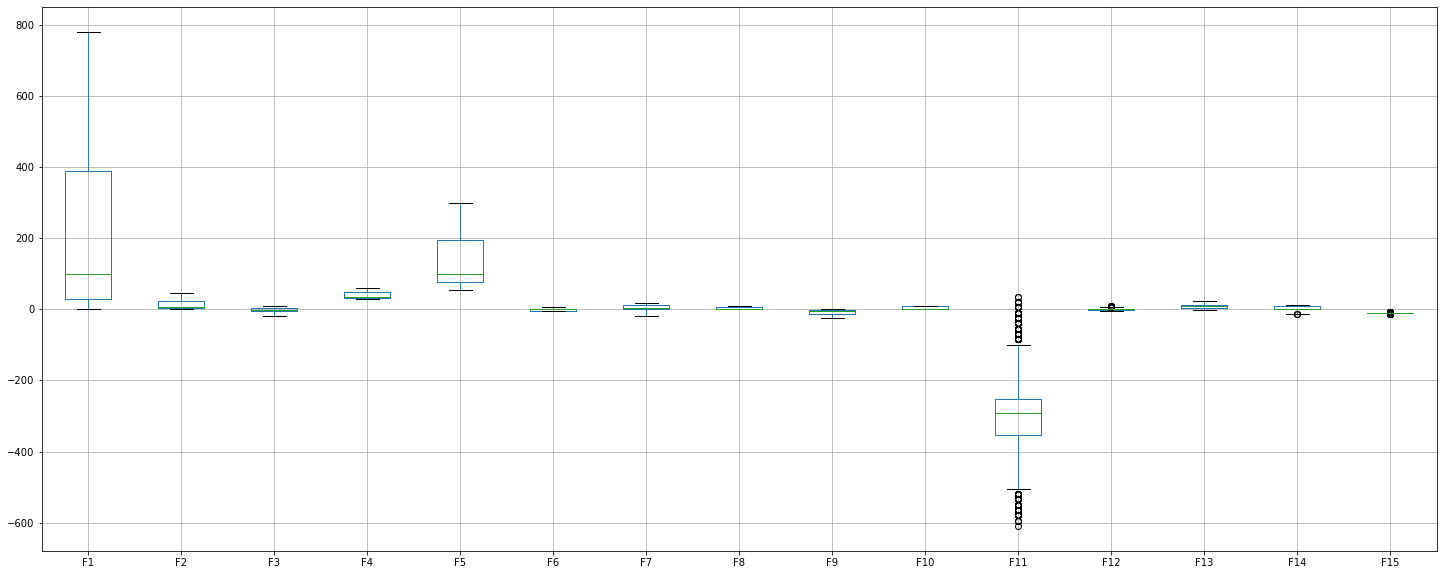

In [129]:
x.boxplot(figsize=(25,10))

In [126]:
x.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
F1,1.000000,0.706639,0.690864,0.755121,0.540342,-0.675264,0.679250,0.733312,-0.600153,0.742369,-0.069969,-0.012291,-0.676389,0.682649,0.170000
F2,0.706639,1.000000,0.763419,0.837365,0.672167,-0.762769,0.755101,0.834246,-0.637508,0.888977,-0.194739,-0.276405,-0.753287,0.750944,0.211100
F3,0.690864,0.763419,1.000000,0.883349,0.614240,-0.809473,0.813816,0.863434,-0.614027,0.868528,-0.205886,-0.176375,-0.791322,0.804545,0.124089
F4,0.755121,0.837365,0.883349,1.000000,0.727545,-0.887500,0.884842,0.906307,-0.681754,0.956640,-0.224060,-0.182643,-0.873428,0.873595,0.138278
F5,0.540342,0.672167,0.614240,0.727545,1.000000,-0.619599,0.599455,0.721849,-0.599113,0.744822,-0.088436,-0.204661,-0.595590,0.611131,0.254427
F6,-0.675264,-0.762769,-0.809473,-0.887500,-0.619599,1.000000,-0.826213,-0.867305,0.637027,-0.877293,0.207080,0.181686,0.818105,-0.807678,-0.122998
F7,0.679250,0.755101,0.813816,0.884842,0.599455,-0.826213,1.000000,0.861852,-0.630234,0.873724,-0.215099,-0.167082,-0.802995,0.804192,0.112154
F8,0.733312,0.834246,0.863434,0.906307,0.721849,-0.867305,0.861852,1.000000,-0.697186,0.954840,-0.203882,-0.201330,-0.854378,0.855536,0.166141
F9,-0.600153,-0.637508,-0.614027,-0.681754,-0.599113,0.637027,-0.630234,-0.697186,1.000000,-0.738079,-0.238974,0.336565,0.620092,-0.611943,-0.161890
F10,0.742369,0.888977,0.868528,0.956640,0.744822,-0.877293,0.873724,0.954840,-0.738079,1.000000,-0.194345,-0.229981,-0.865109,0.863027,0.225362


<AxesSubplot:>

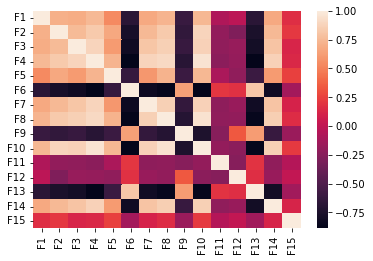

In [128]:
sns.heatmap(x.corr(),annot=False)

In [53]:
scaled = StandardScaler()

In [54]:
X = scaled.fit_transform(x)

In [55]:
X

array([[-0.86128368, -0.68430127, -0.73305661, ...,  0.51897838,
        -1.13442665,  1.313639  ],
       [-0.90391107, -1.04047209, -0.67017153, ...,  1.004843  ,
        -0.80762887,  0.        ],
       [ 1.75603838,  2.19281881,  0.26131371, ..., -1.10726273,
         0.97204096,  0.24359466],
       ...,
       [-0.24744919,  0.41196474,  1.2281718 , ..., -1.58108113,
         1.29490142,  0.        ],
       [ 0.00831518,  0.40040075,  0.57966942, ..., -1.22370962,
         1.08622332,  0.        ],
       [-0.84423272, -0.73980841, -0.43042217, ...,  1.43449189,
        -0.44539519, -0.95316547]])

In [56]:
y = df['Class'].copy()

In [57]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1495    0
1496    0
1497    1
1498    0
1499    1
Name: Class, Length: 1500, dtype: int64

C:\Users\Dell\miniconda3\envs\ce802\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


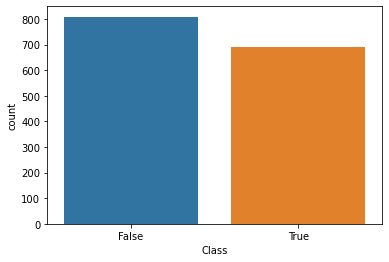

In [58]:
g = sns.countplot(y)
g.set_xticklabels(['False','True'])
plt.show()

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [62]:
clf = DecisionTreeClassifier()

In [63]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred= clf.predict(X_test)

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7474747474747475


In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
print(confusion_matrix(y_test,y_pred))

[[210  59]
 [ 66 160]]


In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)


In [45]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

In [46]:
y_forest_pred = forest.predict(X_test)

In [47]:
print(metrics.accuracy_score(y_test,y_forest_pred))

0.8080808080808081


In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression()

In [70]:

lr.fit(X_train, y_train)

LogisticRegression()

In [71]:
y3 = lr.predict(X_test)

In [72]:
print(metrics.accuracy_score(y_test,y3))

0.8525252525252526


In [73]:
print(confusion_matrix(y_test,y3))

[[241  28]
 [ 45 181]]


In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [83]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [84]:
y5 = knn_model.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.3889007342427208

In [86]:
print(metrics.accuracy_score(y_test, y5))

0.7454545454545455


In [87]:
from sklearn import svm

In [88]:
svm = svm.SVC()

In [89]:
svm.fit(X_train,y_train)

SVC()

In [90]:
y6 = svm.predict(X_test)

In [91]:
print(metrics.accuracy_score(y_test,y6))

0.804040404040404


In [92]:
df1= pd.read_csv("CE802_P2_Test.csv")

In [93]:
df1

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4,5.58,-4.66,31.83,69.04,-0.35,-1.29,0.06,-3.67,1,-243.75,0.94,13.84,-1.48,-11.04,NaN
1,80,37.95,4.40,50.70,199.04,-4.83,5.19,7.25,-4.67,10,-474.75,-3.34,0.46,8.72,NaN,NaN
2,60,1.08,-4.14,32.13,73.04,0.14,2.01,0.59,-3.67,1,-234.75,-1.08,9.36,-1.20,-11.71,NaN
3,240,34.95,3.74,44.85,264.04,-2.92,11.52,8.45,-14.67,10,-174.75,-3.20,2.94,4.14,-10.40,NaN
4,42,4.11,-3.78,31.92,92.04,1.09,-2.67,0.72,-3.67,1,-282.75,-0.40,11.20,0.92,-11.14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,62,5.13,-5.32,32.46,72.04,1.17,-1.62,0.41,0.33,1,-306.75,1.20,9.24,0.96,NaN,NaN
1496,30,0.69,-3.96,32.70,78.04,-0.16,-0.57,0.01,-1.67,1,-288.75,1.48,9.68,-0.08,NaN,NaN
1497,94,4.95,-5.38,32.19,91.04,1.99,1.47,0.56,-1.67,1,-252.75,-0.86,12.04,-0.28,NaN,NaN
1498,70,3.72,-6.82,33.06,74.04,0.50,2.52,0.24,0.33,1,-351.75,-0.08,9.48,0.34,NaN,NaN


In [111]:
df1['F15'] = df1['F15'].fillna(df1['F15'].mean())

In [112]:
X1 = df1.drop(['Class'],axis=1)

In [113]:
X1

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,4,5.58,-4.66,31.83,69.04,-0.35,-1.29,0.06,-3.67,1,-243.75,0.94,13.84,-1.48,-11.040000
1,80,37.95,4.40,50.70,199.04,-4.83,5.19,7.25,-4.67,10,-474.75,-3.34,0.46,8.72,-10.496347
2,60,1.08,-4.14,32.13,73.04,0.14,2.01,0.59,-3.67,1,-234.75,-1.08,9.36,-1.20,-11.710000
3,240,34.95,3.74,44.85,264.04,-2.92,11.52,8.45,-14.67,10,-174.75,-3.20,2.94,4.14,-10.400000
4,42,4.11,-3.78,31.92,92.04,1.09,-2.67,0.72,-3.67,1,-282.75,-0.40,11.20,0.92,-11.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,62,5.13,-5.32,32.46,72.04,1.17,-1.62,0.41,0.33,1,-306.75,1.20,9.24,0.96,-10.496347
1496,30,0.69,-3.96,32.70,78.04,-0.16,-0.57,0.01,-1.67,1,-288.75,1.48,9.68,-0.08,-10.496347
1497,94,4.95,-5.38,32.19,91.04,1.99,1.47,0.56,-1.67,1,-252.75,-0.86,12.04,-0.28,-10.496347
1498,70,3.72,-6.82,33.06,74.04,0.50,2.52,0.24,0.33,1,-351.75,-0.08,9.48,0.34,-10.496347


In [114]:
X1_scaled = scaled.fit_transform(X1)

In [115]:
y1 =svm.predict(X1_scaled)

In [116]:
df_final = pd.DataFrame(X1)

In [117]:
df_final['Class'] = y1

In [118]:
df_final

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4,5.58,-4.66,31.83,69.04,-0.35,-1.29,0.06,-3.67,1,-243.75,0.94,13.84,-1.48,-11.040000,1
1,80,37.95,4.40,50.70,199.04,-4.83,5.19,7.25,-4.67,10,-474.75,-3.34,0.46,8.72,-10.496347,1
2,60,1.08,-4.14,32.13,73.04,0.14,2.01,0.59,-3.67,1,-234.75,-1.08,9.36,-1.20,-11.710000,1
3,240,34.95,3.74,44.85,264.04,-2.92,11.52,8.45,-14.67,10,-174.75,-3.20,2.94,4.14,-10.400000,0
4,42,4.11,-3.78,31.92,92.04,1.09,-2.67,0.72,-3.67,1,-282.75,-0.40,11.20,0.92,-11.140000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,62,5.13,-5.32,32.46,72.04,1.17,-1.62,0.41,0.33,1,-306.75,1.20,9.24,0.96,-10.496347,1
1496,30,0.69,-3.96,32.70,78.04,-0.16,-0.57,0.01,-1.67,1,-288.75,1.48,9.68,-0.08,-10.496347,1
1497,94,4.95,-5.38,32.19,91.04,1.99,1.47,0.56,-1.67,1,-252.75,-0.86,12.04,-0.28,-10.496347,0
1498,70,3.72,-6.82,33.06,74.04,0.50,2.52,0.24,0.33,1,-351.75,-0.08,9.48,0.34,-10.496347,1


In [119]:
df_final['Class'].replace({0: False, 1: True}, inplace=True)

In [120]:
df_final

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4,5.58,-4.66,31.83,69.04,-0.35,-1.29,0.06,-3.67,1,-243.75,0.94,13.84,-1.48,-11.040000,True
1,80,37.95,4.40,50.70,199.04,-4.83,5.19,7.25,-4.67,10,-474.75,-3.34,0.46,8.72,-10.496347,True
2,60,1.08,-4.14,32.13,73.04,0.14,2.01,0.59,-3.67,1,-234.75,-1.08,9.36,-1.20,-11.710000,True
3,240,34.95,3.74,44.85,264.04,-2.92,11.52,8.45,-14.67,10,-174.75,-3.20,2.94,4.14,-10.400000,False
4,42,4.11,-3.78,31.92,92.04,1.09,-2.67,0.72,-3.67,1,-282.75,-0.40,11.20,0.92,-11.140000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,62,5.13,-5.32,32.46,72.04,1.17,-1.62,0.41,0.33,1,-306.75,1.20,9.24,0.96,-10.496347,True
1496,30,0.69,-3.96,32.70,78.04,-0.16,-0.57,0.01,-1.67,1,-288.75,1.48,9.68,-0.08,-10.496347,True
1497,94,4.95,-5.38,32.19,91.04,1.99,1.47,0.56,-1.67,1,-252.75,-0.86,12.04,-0.28,-10.496347,False
1498,70,3.72,-6.82,33.06,74.04,0.50,2.52,0.24,0.33,1,-351.75,-0.08,9.48,0.34,-10.496347,True


In [121]:
df_final.to_csv('Task1.csv', index=False)

In [122]:
y1 =lr.predict(X1_scaled)

In [123]:
df_final['Class'] = y1

In [124]:
df_final.to_csv('Task1_Safi.csv', index=False)